In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Movie-Dataset.csv")

In [3]:
#Basic Cleaning
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df.dropna(subset=['movie_id','movie_name'])
print("Cleaned Dataset Preview:")
print(df.head())

Cleaned Dataset Preview:
   Unnamed: 0    movie_id                       movie_name    year  \
0           0  tt15354916                            Jawan  2023.0   
1           1  tt15748830                       Jaane Jaan  2023.0   
2           2  tt11663228                           Jailer  2023.0   
3           3  tt14993250  Rocky Aur Rani Kii Prem Kahaani  2023.0   
4           4  tt15732324                            OMG 2  2023.0   

                   genre                                           overview  \
0       Action, Thriller  A high-octane action thriller which outlines t...   
1  Crime, Drama, Mystery  A single mother and her daughter who commit a ...   
2  Action, Comedy, Crime  A retired jailer goes on a manhunt to find his...   
3  Comedy, Drama, Family  Flamboyant Punjabi Rocky and intellectual Beng...   
4          Comedy, Drama  An unhappy civilian asks the court to mandate ...   

            director                                               cast  
0    

In [4]:
#Popular Movies (based on counts or year)
popular_movies = df.groupby('movie_name').size().sort_values(ascending=False).head(10)
print("\nTop 10 Most Listed Movies:")
print(popular_movies)


Top 10 Most Listed Movies:
movie_name
Don                       3
Zanjeer                   2
Saudagar                  2
Chameli                   2
Bade Miyan Chote Miyan    2
Jurm                      2
Rajnigandha               2
Mausam                    2
Amar Prem                 2
Amar Akbar Anthony        2
dtype: int64


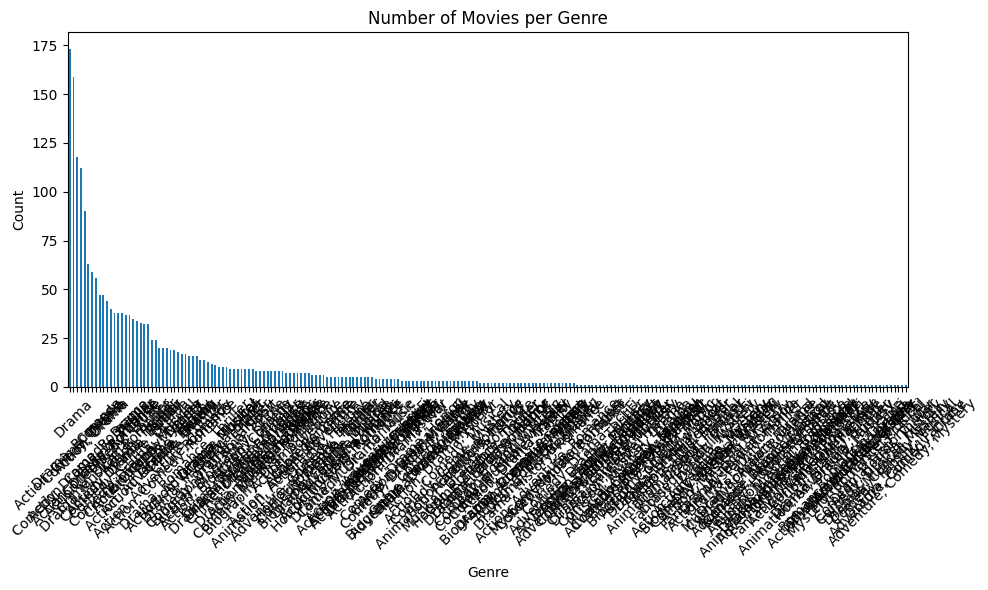

In [5]:
#Genre-wise Movie Count
genre_count = df['genre'].value_counts()
plt.figure(figsize=(10,6))
genre_count.plot(kind='bar')
plt.title("Number of Movies per Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
#Sort Movies (latest first)
sorted_movies = df.sort_values(by="year", ascending=False)
print("\nMovies Sorted by Release Year:")
print(sorted_movies[['movie_name','year']].head())


Movies Sorted by Release Year:
                           movie_name    year
937                      Brahmastra 2  2026.0
294          Don 3: The Final Chapter  2025.0
1773                     Khiladi 1080  2025.0
699   Untitled Soorarai Pottru remake  2024.0
2000                       Thangalaan  2024.0


In [7]:
#Recommend Top Movies by Genre
def recommend_by_genre(genre_name, n=5):
    filtered = df[df['genre'].str.contains(genre_name, case=False, na=False)]
    recommended = filtered.sort_values(by='year', ascending=False).head(n)
    return recommended[['movie_name','year','genre','director']]
print("\nTop Recommendations (Example: Action):")
print(recommend_by_genre("Action"))


Top Recommendations (Example: Action):
                           movie_name    year                       genre  \
937                      Brahmastra 2  2026.0  Action, Adventure, Fantasy   
1773                     Khiladi 1080  2025.0                      Action   
294          Don 3: The Final Chapter  2025.0            Action, Thriller   
699   Untitled Soorarai Pottru remake  2024.0               Action, Drama   
84                      Kalki 2898-AD  2024.0      Action, Drama, Fantasy   

            director  
937     Ayan Mukerji  
1773  Kabir Sadanand  
294    Farhan Akhtar  
699    Sudha Kongara  
84        Nag Ashwin  


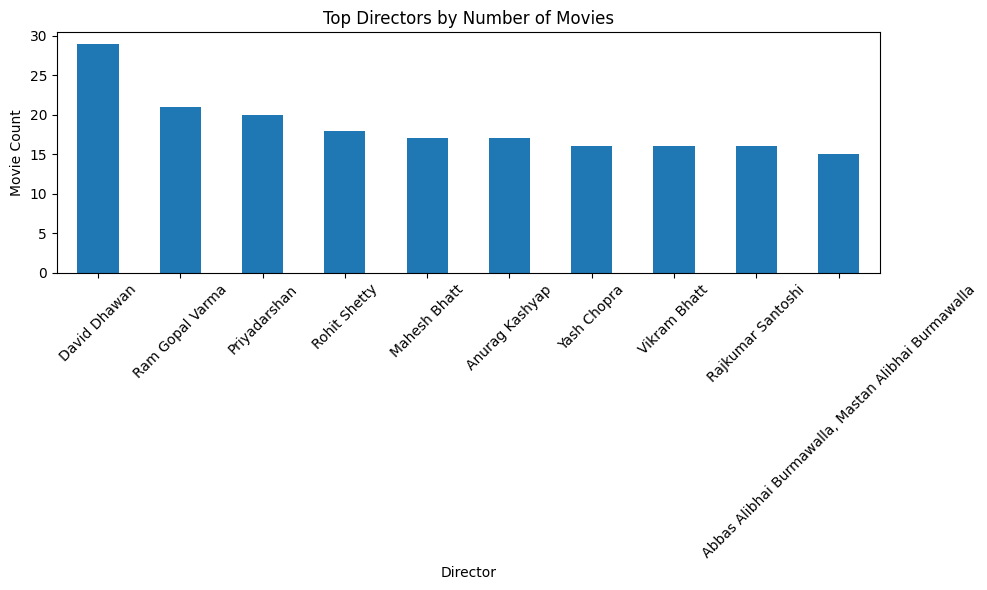

In [8]:
#Director-wise Movie Count
director_count = df['director'].value_counts().head(10)
plt.figure(figsize=(10,6))
director_count.plot(kind='bar')
plt.title("Top Directors by Number of Movies")
plt.xlabel("Director")
plt.ylabel("Movie Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

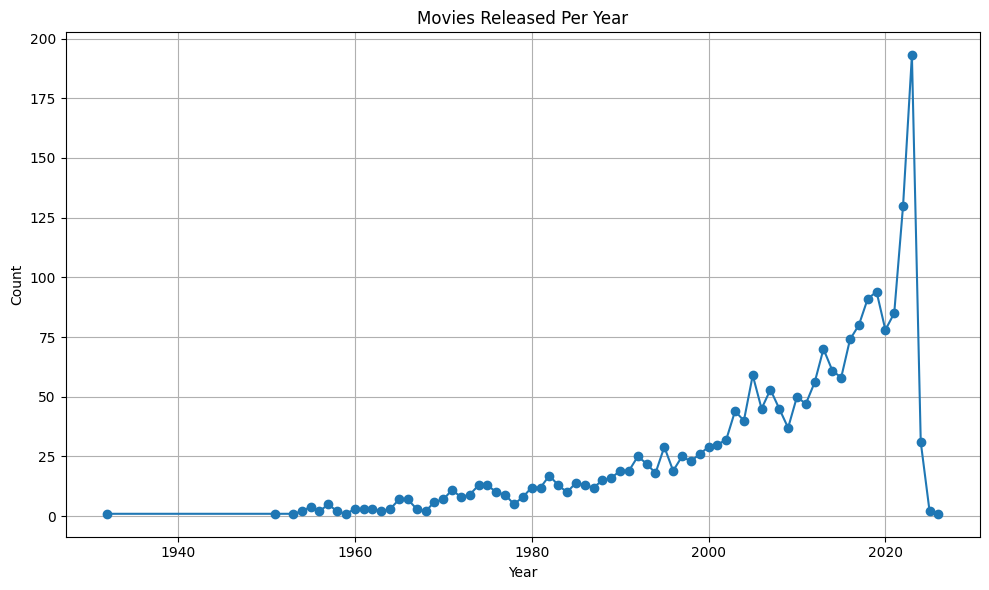

In [9]:
#Year-wise Movie Count (Trend)
year_count = df['year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
year_count.plot(kind='line', marker='o')
plt.title("Movies Released Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid()
plt.tight_layout()
plt.show()